# Von Mises Plasticity with Mixed Hardening


### Load packages

In [1]:
using Tensors, ConstLab
using ConstLab: MixedControl, Plastic, PlasticState

### Define the strain control

In [2]:
ncycles = 5
timesteps = range(0.0, 2pi*ncycles; length=200*ncycles)
ε_amp = 0.005 # Strain amplitute for ε_11
ctrl = MixedControl(
    # Strain
    t -> SymmetricTensor{2,3}((i,j) -> i == j == 1 ? ε_amp*sin(t) : 0.0),
    # Controlled strain components
    SymmetricTensor{2,3}((true, false, false, false, false, false)),
    # Stress
    t -> zero(SymmetricTensor{2,3}),
    # Controlled stress components
    SymmetricTensor{2,3}((false, true, true, true, true, true))
);

### Set material parameters

In [3]:
E = 200.0e9
ν =  0.3
G = E/(2*(1+ν))
K = E/(3*(1-2*ν))
σ_y = 200.0e6
H = 0.1*E
κ∞ = 0.2*σ_y
α∞ = 0.1*σ_y
r = 0.5

model = Plastic(G, K, σ_y, H, κ∞, α∞, r);

### Set initial conditions

In [4]:
s0 = let z = zero(SymmetricTensor{2,3})
    PlasticState(z, z, 0.0, z, 0.0)
end;

### Do integration

In [5]:
res = ConstLab.integrate(model, ctrl, timesteps, s0; solver_params=Dict(:method => :newton));

### Plot results

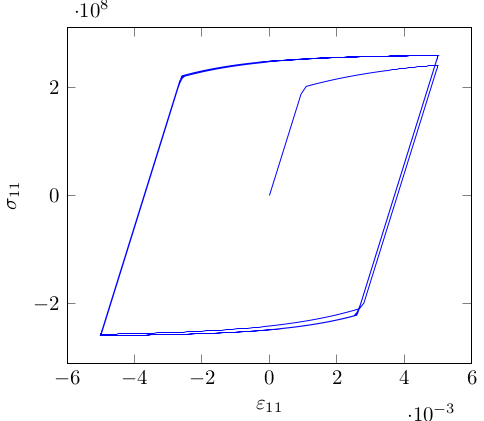

In [6]:
using PGFPlotsX, LaTeXStrings

p = @pgf Axis({xlabel=L"\varepsilon_{11}", ylabel=L"\sigma_{11}"},
    PlotInc({mark="none"},
        Coordinates([r.ε[1,1] for r in res],
                    [r.σ[1,1] for r in res])
    ),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*